In [ ]:
# Load the necessary libraries
import numpy as np
import pandas as pd                # For reading files
import matplotlib.pyplot as plt    # For Data visualization
import seaborn as sns              # For Data visualization

In [ ]:
# Importing the file
from google.colab import files
a = files.upload()

Saving Employee Dataset.csv to Employee Dataset.csv


In [ ]:
# Reading CSV
data = pd.read_csv('Employee Dataset.csv')

In [ ]:
data.head()

,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,A,36,5,5,2297
1,1,A,26,3,5,1134
2,2,A,61,8,1,4969
3,3,O,24,3,6,902
4,4,O,39,6,2,3574


In [ ]:
data.shape                                     # (50, 6)
data.size                                      # 300
data.columns

Index(['id', 'groups', 'age', 'healthy_eating', 'active_lifestyle', 'salary'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                50 non-null     int64 
 1   groups            50 non-null     object
 2   age               50 non-null     int64 
 3   healthy_eating    50 non-null     int64 
 4   active_lifestyle  50 non-null     int64 
 5   salary            50 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.5+ KB


# Data Visualizations
**Now lets get our hands dirty on some cool yet insightful Visualizations!!**

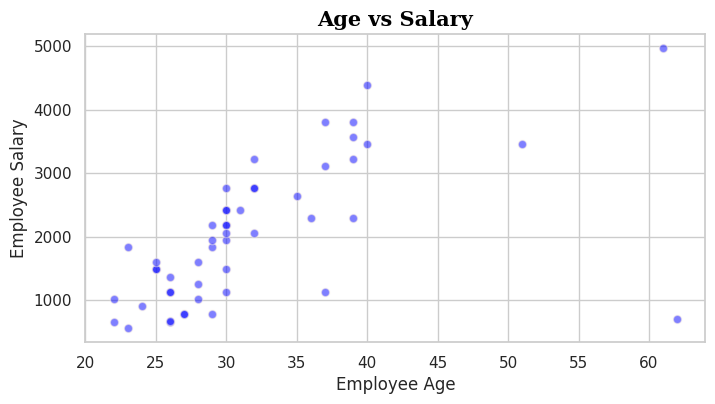

In [ ]:
# 1. Creating a 'scatter plot' of 'Age' and 'Employee Salary' features
# Purpose: To see if older employees tend to earn more.
x = data['age']
y = data['salary']

plt.figure(figsize=(8,4))
sns.set(style="whitegrid")

plt.scatter(x,y,color='blue',edgecolors='linen',alpha=0.5)

plt.xlabel('Employee Age')
plt.ylabel('Employee Salary')

plt.title('Age vs Salary',fontdict={'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 15})
plt.show()

As we can observe the salary is increasing as the employee age increases, though there are some outliers presesnt as well

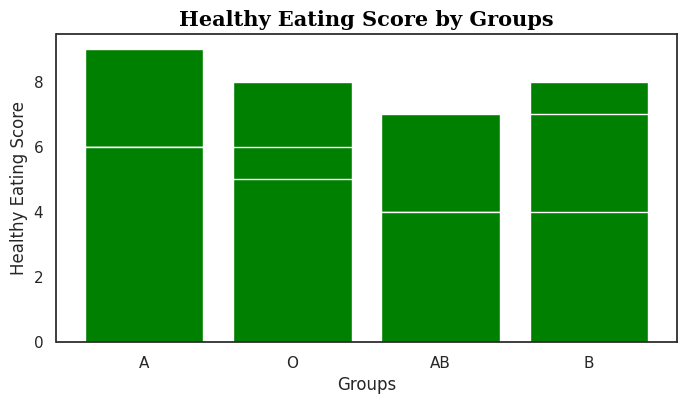

In [ ]:
# 2. Creating a 'Bar plot' to check 'Healthy Eating Score' by 'Groups'
# Purpose: Understand how health habits vary across departments or teams
plt.figure(figsize=(8,4))

x = data['groups']
y = data['healthy_eating']

plt.xlabel('Groups',fontsize=12)
plt.ylabel('Healthy Eating Score',fontsize=12)

plt.bar(x,y,color='green')

plt.title("Healthy Eating Score by Groups",fontdict={'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 15})
plt.show()

It is observed that group 'A' eats the healthiest among all!! ha good for them :)

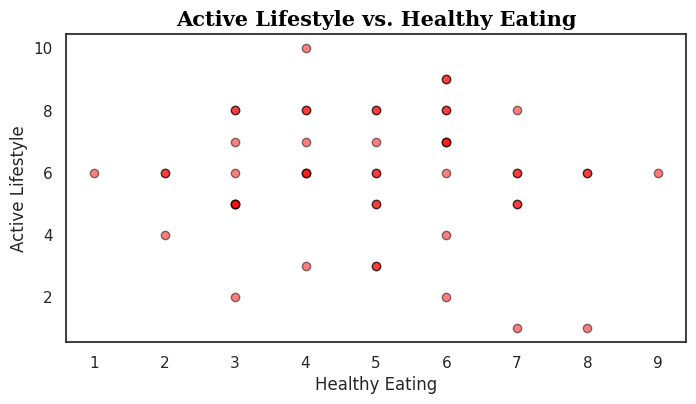

In [ ]:
# 3. Active Lifestyle vs. Healthy Eating (Correlation Plot)
# Purpose: Do people who eat well also stay physically active?
plt.figure(figsize=(8,4))

x = data['healthy_eating']
y = data['active_lifestyle']

plt.xlabel('Healthy Eating',fontsize=12)
plt.ylabel('Active Lifestyle',fontsize=12)

plt.scatter(x,y,color='red',edgecolors='black',alpha=0.5)

plt.title('Active Lifestyle vs. Healthy Eating',fontdict={'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 15})
plt.show()

It is observed that as the healthy eating habit increases, the active lifestyle also increases

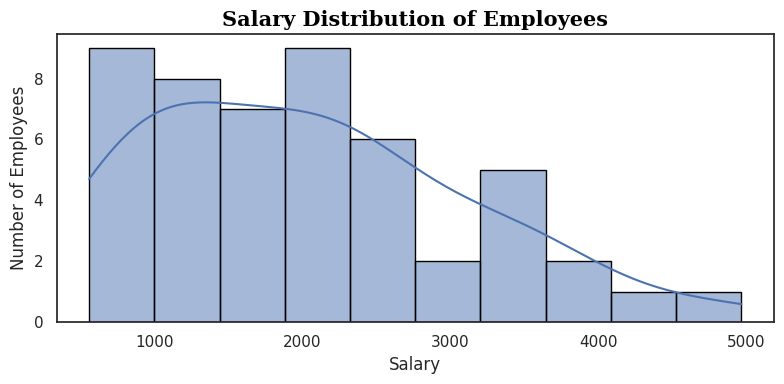

In [ ]:
# 4. Creating a Salary Distribution Histogram
# Purpose: View salary inequality or spread in the dataset
plt.figure(figsize=(8,4))
sns.set_style('white')
x = data['salary']

plt.xlabel('Salary')
plt.ylabel('Number of Employees')

sns.histplot(data=data,x=x,kde=True,bins=10,edgecolor='black')

plt.title('Salary Distribution of Employees',fontdict={'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 15})
plt.tight_layout()
plt.show()

Skewness: 0.67 ✅ (it is calculated by running this: `data['salary'].skew()`)

This is a positive skew (right-skewed distribution)

Most employees earn around the average or lower, and a few earn much more, which pulls the mean to the right



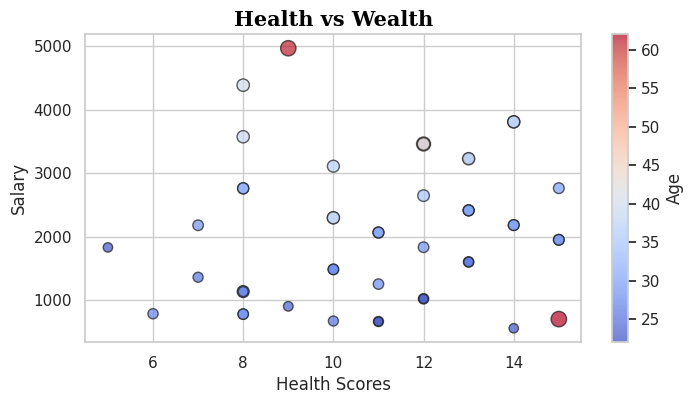

In [ ]:
# 5. Health vs Wealth
# Purpose: Relate health scores (healthy eating + active lifestyle) to salary
plt.figure(figsize=(8,4))
sns.set(style="whitegrid")
data['health_score'] = data['healthy_eating'] + data['active_lifestyle']

x = data['health_score']
y = data['salary']

plt.scatter(x,y,s=data['age'] * 2,c=data['age'], cmap='coolwarm',alpha=0.7,edgecolors='k')
plt.colorbar(label='Age')

plt.xlabel('Health Scores',fontsize = 12)
plt.ylabel('Salary',fontsize= 12)

plt.title('Health vs Wealth',fontdict={'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 15})
plt.show()

It has Observed the Following:

1. Positive Trend (Mild Correlation):
As the health score increases, salary tends to increase slightly.
This suggests a weak but noticeable positive relationship healthier employees might be earning a bit more.

2. Outliers Exist:
A few employees with low health scores still have high salaries possibly older or senior roles.
Likewise, some very healthy individuals are in the lower salary range, maybe younger or junior staff.




# Subset the data based on thresholds
We will now subset the original data frame based on the following conditions:

1.  Employees with healthy_eating greater than 8
2.  Employees with Salary less than 1000
3.  Employees with healthy_eating greater than 8, and with salary less than 1000





In [ ]:
# 1. Employees with healthy_eating greater than 8
data[data['healthy_eating'] > 8]

,id,groups,age,healthy_eating,active_lifestyle,salary,health_score
26,26,A,62,9,6,700,15


In [ ]:
# 2. Employees with Salary less than 1000
data[data['salary'] < 1000]

,id,groups,age,healthy_eating,active_lifestyle,salary,health_score
3,3,O,24,3,6,902,9
15,15,B,26,3,8,662,11
18,18,A,27,2,6,779,8
26,26,A,62,9,6,700,15
32,32,A,22,3,8,662,11
35,35,O,27,2,4,785,6
38,38,AB,26,3,7,670,10
39,39,B,29,2,6,779,8
43,43,O,23,4,10,556,14


In [ ]:
# 3. Employees with healthy_eating greater than 8, and with salary less than 1000
data[(data['healthy_eating'] > 8) & (data['salary'] < 1000)]

,id,groups,age,healthy_eating,active_lifestyle,salary,health_score
26,26,A,62,9,6,700,15


**Observations:**
1. The only employee seemingly facing a discrepancy in salary as compared to healthy_eating is employee who is having id = 26.
2. The employee with ID having 26 has a salary of 700.